In [49]:
import time, sys
from prime_number_generation import generate_large_prime
import matplotlib.pyplot as plt
import numpy as np
sys.setrecursionlimit(4000)  # Set the recursion limit to 2000

In [50]:
def prime_number_time(sizes: list[int]):
    results = []
    for size in sizes:
        start_time = time.perf_counter()
        primes = generate_large_prime(size)
        end_time = time.perf_counter()
        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        results.append((size, elapsed_time))
    return results

In [51]:
sizes = [64, 128, 256, 512, 1024, 2048]
results = prime_number_time(sizes)

In [52]:
x = np.array([size for size in sizes], dtype=np.float64)
y = np.array([elapsed for _, elapsed in results], dtype=np.float64)

results: [(64, 1.720599946565926), (128, 18.90509994700551), (256, 28.896400006487966), (512, 416.0904000746086), (1024, 3235.7479999773204), (2048, 77085.23050008807)]
Average constant for O(n^4): 3.218171623153566e-08
Average constant for O(n^3): 5.398020639938191e-06
Average constant for O(n^2): 0.0041777546577979425
Average constant for O(n): 6.98321940900352


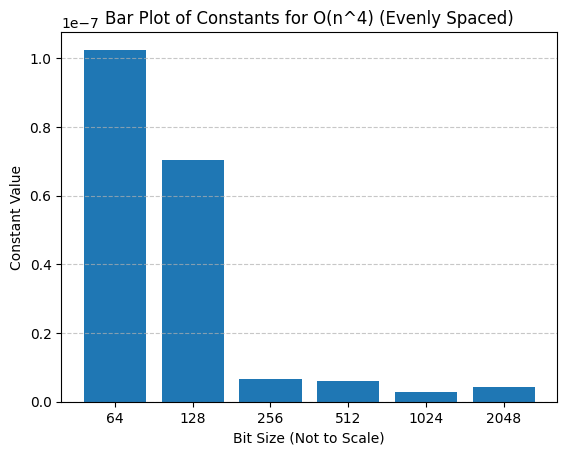

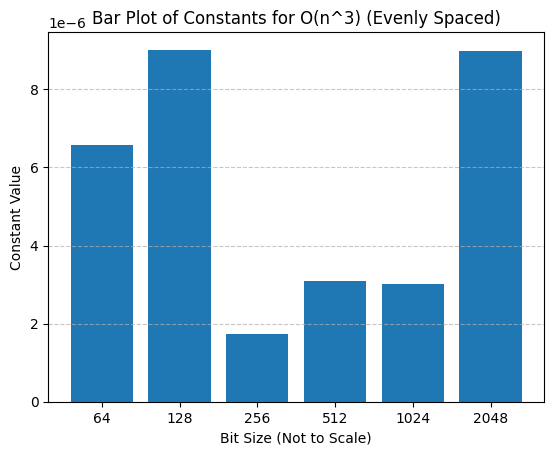

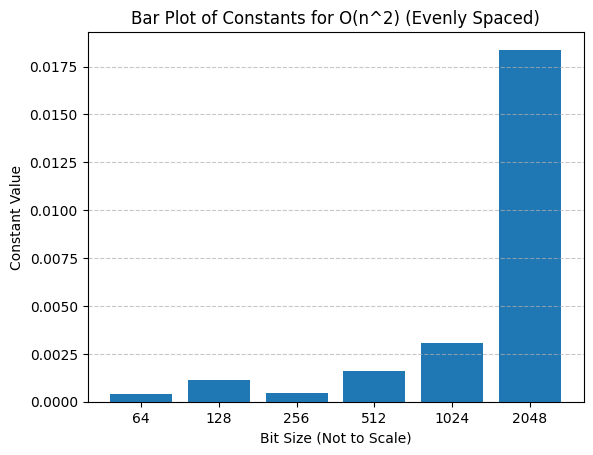

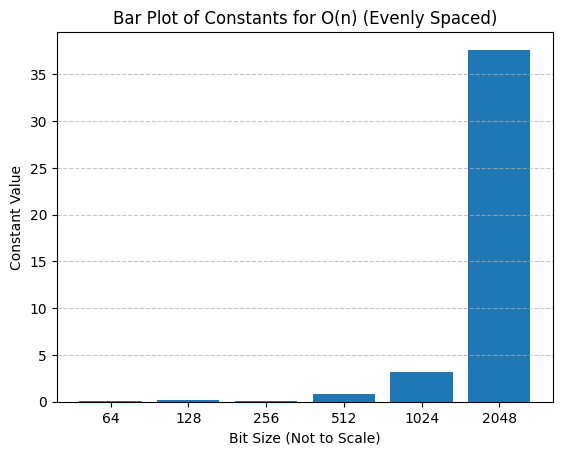

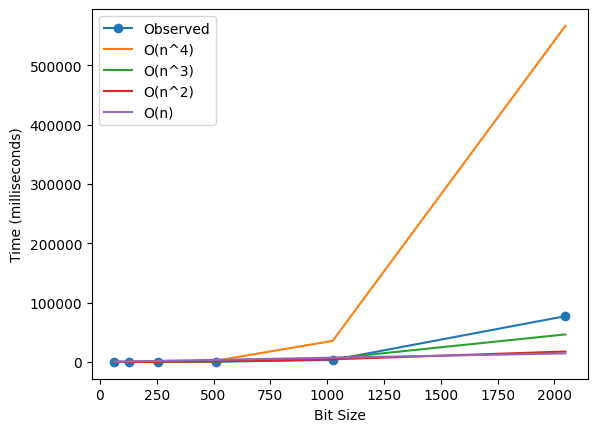

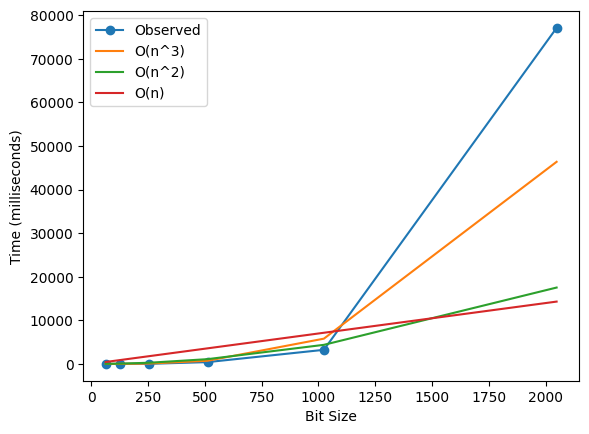

In [54]:
print(f"results: {results}")

quartic = x**4
quartic_constants = y / quartic
avg_quartic_constant = np.mean(quartic_constants)

cubic = x**3
cubic_constants = y / cubic
avg_cubic_constant = np.mean(cubic_constants)

squared = x**2
squared_constants = y / squared
avg_squared_constant = np.mean(squared_constants)

linear = x
linear_constants = y / linear
avg_linear_constant = np.mean(linear_constants)

# Print constants to check their range
print("Average constant for O(n^4):", avg_quartic_constant)
print("Average constant for O(n^3):", avg_cubic_constant)
print("Average constant for O(n^2):", avg_squared_constant)
print("Average constant for O(n):", avg_linear_constant)

# Plot the constants with evenly spaced bars
evenly_spaced_x = range(len(x))  # Evenly spaced x-axis values
plt.bar(evenly_spaced_x, quartic_constants)
plt.xticks(evenly_spaced_x, labels=x.astype(int))  # Set actual x values as labels
plt.xlabel('Bit Size (Not to Scale)')
plt.ylabel('Constant Value')
plt.title('Bar Plot of Constants for O(n^4) (Evenly Spaced)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.clf()
plt.bar(evenly_spaced_x, cubic_constants)
plt.xticks(evenly_spaced_x, labels=x.astype(int))
plt.xlabel('Bit Size (Not to Scale)')
plt.ylabel('Constant Value')
plt.title('Bar Plot of Constants for O(n^3) (Evenly Spaced)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.clf()
plt.bar(evenly_spaced_x, squared_constants)
plt.xticks(evenly_spaced_x, labels=x.astype(int))
plt.xlabel('Bit Size (Not to Scale)')
plt.ylabel('Constant Value')
plt.title('Bar Plot of Constants for O(n^2) (Evenly Spaced)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.clf()
plt.bar(evenly_spaced_x, linear_constants)
plt.xticks(evenly_spaced_x, labels=x.astype(int))
plt.xlabel('Bit Size (Not to Scale)')
plt.ylabel('Constant Value')
plt.title('Bar Plot of Constants for O(n) (Evenly Spaced)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.clf()
plt.plot(x, y, marker='o', label='Observed')
plt.plot(x, quartic * avg_quartic_constant, label='O(n^4)')
plt.plot(x, cubic * avg_cubic_constant, label='O(n^3)')
plt.plot(x, squared * avg_squared_constant, label='O(n^2)')
plt.plot(x, linear * avg_linear_constant, label='O(n)')
plt.legend()
plt.xlabel('Bit Size')
plt.ylabel('Time (milliseconds)')
plt.show()

plt.clf()
plt.plot(x, y, marker='o', label='Observed')
plt.plot(x, cubic * avg_cubic_constant, label='O(n^3)')
plt.plot(x, squared * avg_squared_constant, label='O(n^2)')
plt.plot(x, linear * avg_linear_constant, label='O(n)')
plt.legend()
plt.xlabel('Bit Size')
plt.ylabel('Time (milliseconds)')
plt.show()